In [2]:
import numpy as np 
import pandas as pd
from tqdm import tqdm

In [3]:
anomaly_dataset=pd.read_csv("./FinalDatasets/AnomalyDataset.csv")

In [4]:
anomaly_dataset.head(5)

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,U,A,P,R,S,F,class,attackType
0,2017-03-15 00:01:29.452,0.000,TCP,192.168.200.4,25,192.168.220.16,51431.0,1,54,0,1,0,1,0,0,victim,portScan
1,2017-03-15 00:01:29.451,0.000,TCP,192.168.220.16,51431,192.168.200.4,25.0,1,58,0,0,0,0,1,0,attacker,portScan
2,2017-03-15 00:01:30.454,0.000,TCP,192.168.200.9,135,192.168.220.16,51491.0,1,58,0,1,0,0,1,0,victim,portScan
3,2017-03-15 00:01:30.453,0.003,TCP,192.168.220.16,51491,192.168.200.9,135.0,2,112,0,0,0,1,1,0,attacker,portScan
4,2017-03-15 00:01:31.453,0.000,TCP,192.168.200.1,52822,192.168.220.16,51357.0,1,54,0,1,0,1,0,0,victim,portScan


In [6]:
anomaly_dataset["class"].value_counts()

victim      4516731
attacker    1422820
Name: class, dtype: int64

In [7]:
anomaly_dataset["attackType"].value_counts()

dos              2491339
synFlood         1580009
redWorm          1255702
portScan          257515
udpFlood           93583
icmpFlood          71030
smurf              71030
landAttack         52417
blasterWorm        24291
httpFlood          22959
scanning            6232
pingScan            6081
bruteForce          4965
reaperWorm          1176
spam                 747
fragmentation        475
Name: attackType, dtype: int64

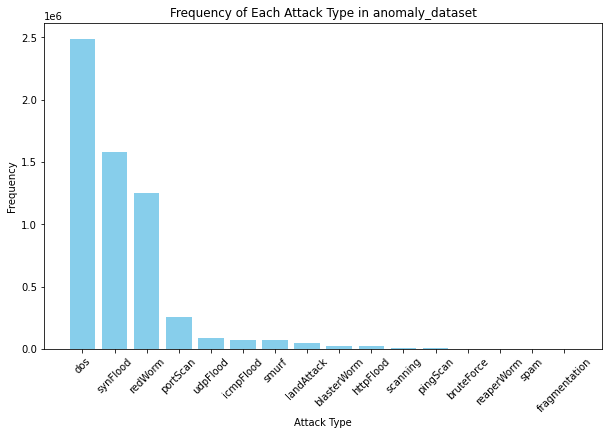

In [8]:
import matplotlib.pyplot as plt
attack_type_counts = anomaly_dataset["attackType"].value_counts()

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(attack_type_counts.index, attack_type_counts.values, color='skyblue')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.title('Frequency of Each Attack Type in anomaly_dataset')
plt.xticks(rotation=45)
plt.show()

In [11]:
from datetime import datetime
def parse_date(date_str):
    try:

        date_obj = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S.%f')
    except ValueError:
        
        date_obj = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
    
    return {
        'year': date_obj.year,
        'month': date_obj.month,
        'day': date_obj.day,
        'hour': date_obj.hour,
        'minute': date_obj.minute,
        'second': date_obj.second + (date_obj.microsecond / 1e6)
    }


# Apply the function to the 'Date first seen' column and create new columns
df_parsed = anomaly_dataset['Date first seen'].apply(lambda x: pd.Series(parse_date(x)))

# Combine the original DataFrame with the parsed date columns
df_combined = pd.concat([anomaly_dataset, df_parsed], axis=1)
df_combined.head(5)

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,U,...,S,F,class,attackType,year,month,day,hour,minute,second
0,2017-03-15 00:01:29.452,0.000,TCP,192.168.200.4,25,192.168.220.16,51431.0,1,54,0,...,0,0,victim,portScan,2017.0,3.0,15.0,0.0,1.0,29.452
1,2017-03-15 00:01:29.451,0.000,TCP,192.168.220.16,51431,192.168.200.4,25.0,1,58,0,...,1,0,attacker,portScan,2017.0,3.0,15.0,0.0,1.0,29.451
2,2017-03-15 00:01:30.454,0.000,TCP,192.168.200.9,135,192.168.220.16,51491.0,1,58,0,...,1,0,victim,portScan,2017.0,3.0,15.0,0.0,1.0,30.454
3,2017-03-15 00:01:30.453,0.003,TCP,192.168.220.16,51491,192.168.200.9,135.0,2,112,0,...,1,0,attacker,portScan,2017.0,3.0,15.0,0.0,1.0,30.453
4,2017-03-15 00:01:31.453,0.000,TCP,192.168.200.1,52822,192.168.220.16,51357.0,1,54,0,...,0,0,victim,portScan,2017.0,3.0,15.0,0.0,1.0,31.453


In [15]:
df_combined['year'] = df_combined['year'].astype(int)

In [16]:
df_combined['month'] = df_combined['month'].astype(int)

In [17]:
df_combined['day'] = df_combined['day'].astype(int)

In [18]:
df_combined['hour'] = df_combined['hour'].astype(int)

In [19]:
df_combined['minute'] = df_combined['minute'].astype(int)

In [20]:
df_combined.head(5)

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,U,...,S,F,class,attackType,year,month,day,hour,minute,second
0,2017-03-15 00:01:29.452,0.000,TCP,192.168.200.4,25,192.168.220.16,51431.0,1,54,0,...,0,0,victim,portScan,2017,3,15,0,1,29.452
1,2017-03-15 00:01:29.451,0.000,TCP,192.168.220.16,51431,192.168.200.4,25.0,1,58,0,...,1,0,attacker,portScan,2017,3,15,0,1,29.451
2,2017-03-15 00:01:30.454,0.000,TCP,192.168.200.9,135,192.168.220.16,51491.0,1,58,0,...,1,0,victim,portScan,2017,3,15,0,1,30.454
3,2017-03-15 00:01:30.453,0.003,TCP,192.168.220.16,51491,192.168.200.9,135.0,2,112,0,...,1,0,attacker,portScan,2017,3,15,0,1,30.453
4,2017-03-15 00:01:31.453,0.000,TCP,192.168.200.1,52822,192.168.220.16,51357.0,1,54,0,...,0,0,victim,portScan,2017,3,15,0,1,31.453


In [23]:
df_combined.to_csv("./FinalDatasets/Anomaly_engineered.csv", index=False)

In [24]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5939551 entries, 0 to 5939550
Data columns (total 23 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Date first seen  object 
 1   Duration         float64
 2   Proto            object 
 3   Src IP Addr      object 
 4   Src Pt           int64  
 5   Dst IP Addr      object 
 6   Dst Pt           float64
 7   Packets          int64  
 8   Bytes            int64  
 9   U                int64  
 10  A                int64  
 11  P                int64  
 12  R                int64  
 13  S                int64  
 14  F                int64  
 15  class            object 
 16  attackType       object 
 17  year             int64  
 18  month            int64  
 19  day              int64  
 20  hour             int64  
 21  minute           int64  
 22  second           float64
dtypes: float64(3), int64(14), object(6)
memory usage: 1.0+ GB


In [32]:
for col in ['Proto']:
    df_combined['Protocol'] = df_combined[col].astype('category')

In [33]:
df_combined.head(5)

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,U,...,F,class,attackType,year,month,day,hour,minute,second,Protocol
0,2017-03-15 00:01:29.452,0.000,TCP,192.168.200.4,25,192.168.220.16,51431.0,1,54,0,...,0,victim,portScan,2017,3,15,0,1,29.452,TCP
1,2017-03-15 00:01:29.451,0.000,TCP,192.168.220.16,51431,192.168.200.4,25.0,1,58,0,...,0,attacker,portScan,2017,3,15,0,1,29.451,TCP
2,2017-03-15 00:01:30.454,0.000,TCP,192.168.200.9,135,192.168.220.16,51491.0,1,58,0,...,0,victim,portScan,2017,3,15,0,1,30.454,TCP
3,2017-03-15 00:01:30.453,0.003,TCP,192.168.220.16,51491,192.168.200.9,135.0,2,112,0,...,0,attacker,portScan,2017,3,15,0,1,30.453,TCP
4,2017-03-15 00:01:31.453,0.000,TCP,192.168.200.1,52822,192.168.220.16,51357.0,1,54,0,...,0,victim,portScan,2017,3,15,0,1,31.453,TCP


In [28]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5939551 entries, 0 to 5939550
Data columns (total 24 columns):
 #   Column           Dtype   
---  ------           -----   
 0   Date first seen  object  
 1   Duration         float64 
 2   Proto            object  
 3   Src IP Addr      object  
 4   Src Pt           int64   
 5   Dst IP Addr      object  
 6   Dst Pt           float64 
 7   Packets          int64   
 8   Bytes            int64   
 9   U                int64   
 10  A                int64   
 11  P                int64   
 12  R                int64   
 13  S                int64   
 14  F                int64   
 15  class            object  
 16  attackType       object  
 17  year             int64   
 18  month            int64   
 19  day              int64   
 20  hour             int64   
 21  minute           int64   
 22  second           float64 
 23  Protocol         category
dtypes: category(1), float64(3), int64(14), object(6)
memory usage: 1.0+ GB


In [35]:
df_combined['Protocol'] = df_combined['Protocol'].astype('category').cat.codes
df_combined = pd.get_dummies(df_combined, columns=['Protocol'])

In [36]:
df_combined.head(5)

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,U,...,attackType,year,month,day,hour,minute,second,Protocol_0,Protocol_1,Protocol_2
0,2017-03-15 00:01:29.452,0.000,TCP,192.168.200.4,25,192.168.220.16,51431.0,1,54,0,...,portScan,2017,3,15,0,1,29.452,0,1,0
1,2017-03-15 00:01:29.451,0.000,TCP,192.168.220.16,51431,192.168.200.4,25.0,1,58,0,...,portScan,2017,3,15,0,1,29.451,0,1,0
2,2017-03-15 00:01:30.454,0.000,TCP,192.168.200.9,135,192.168.220.16,51491.0,1,58,0,...,portScan,2017,3,15,0,1,30.454,0,1,0
3,2017-03-15 00:01:30.453,0.003,TCP,192.168.220.16,51491,192.168.200.9,135.0,2,112,0,...,portScan,2017,3,15,0,1,30.453,0,1,0
4,2017-03-15 00:01:31.453,0.000,TCP,192.168.200.1,52822,192.168.220.16,51357.0,1,54,0,...,portScan,2017,3,15,0,1,31.453,0,1,0


In [37]:
df_combined["Proto"].value_counts()

TCP     5684774
ICMP     157218
UDP       97559
Name: Proto, dtype: int64

In [38]:
anomaly_dataset["Proto"].value_counts()

TCP     5684774
ICMP     157218
UDP       97559
Name: Proto, dtype: int64

In [39]:
total=pd.read_csv("./FinalDatasets/TotalDataset.csv")

In [40]:
total["Proto"].value_counts()

TCP      30939948
UDP       7811960
ICMP       663456
IPv6       165062
ICMP6       21500
GRE         18337
ESP         16998
AH           4225
OSPF          592
IGMP          445
PIM           221
VRRP          185
IPIP           80
Name: Proto, dtype: int64

In [43]:
df_combined.rename(columns={'ICMP': 'IPv6'}, inplace=True)

In [44]:
df_combined['ICMP6'] = 0

In [45]:
df_combined['GRE'] = 0

In [46]:
df_combined['ESP'] = 0

In [47]:
df_combined['AH'] = 0

In [48]:
df_combined['OSPF'] = 0

In [49]:
df_combined['IGMP'] = 0

In [50]:
df_combined['PIM'] = 0

In [51]:
df_combined['VRRP'] = 0

In [52]:
df_combined['IPIP'] = 0

In [53]:
df_combined.rename(columns={'Protocol_1': 'TCP'}, inplace=True)

In [54]:
df_combined.head(5)

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,U,...,IPv6,ICMP6,GRE,ESP,AH,OSPF,IGMP,PIM,VRRP,IPIP
0,2017-03-15 00:01:29.452,0.000,TCP,192.168.200.4,25,192.168.220.16,51431.0,1,54,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-03-15 00:01:29.451,0.000,TCP,192.168.220.16,51431,192.168.200.4,25.0,1,58,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-03-15 00:01:30.454,0.000,TCP,192.168.200.9,135,192.168.220.16,51491.0,1,58,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-03-15 00:01:30.453,0.003,TCP,192.168.220.16,51491,192.168.200.9,135.0,2,112,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-03-15 00:01:31.453,0.000,TCP,192.168.200.1,52822,192.168.220.16,51357.0,1,54,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
column_names = df_combined.columns.tolist()

# Print the list of column names
print(column_names)

['Date first seen', 'Duration', 'Proto', 'Src IP Addr', 'Src Pt', 'Dst IP Addr', 'Dst Pt', 'Packets', 'Bytes', 'U', 'A', 'P', 'R', 'S', 'F', 'class', 'attackType', 'year', 'month', 'day', 'hour', 'minute', 'second', 'Protocol_0', 'TCP', 'Protocol_2', 'IPv6', 'ICMP6', 'GRE', 'ESP', 'AH', 'OSPF', 'IGMP', 'PIM', 'VRRP', 'IPIP']


In [57]:
df_combined.rename(columns={'Protocol_0': 'ICMP'}, inplace=True)

In [62]:
df_combined.rename(columns={'Protocol_2': 'UDP'}, inplace=True)

In [63]:
column_names = df_combined.columns.tolist()

# Print the list of column names
print(column_names)

['Date first seen', 'Duration', 'Proto', 'Src IP Addr', 'Src Pt', 'Dst IP Addr', 'Dst Pt', 'Packets', 'Bytes', 'U', 'A', 'P', 'R', 'S', 'F', 'class', 'attackType', 'year', 'month', 'day', 'hour', 'minute', 'second', 'ICMP', 'TCP', 'UDP', 'IPv6', 'ICMP6', 'GRE', 'ESP', 'AH', 'OSPF', 'IGMP', 'PIM', 'VRRP', 'IPIP']


In [64]:
import ipaddress

def check_ip_address(ip_str):
    try:
        ip_obj = ipaddress.ip_address(ip_str)
        if isinstance(ip_obj, ipaddress.IPv4Address):
            return "IPv4"
        elif isinstance(ip_obj, ipaddress.IPv6Address):
            return "IPv6"
    except ValueError:
        return "Invalid IP address"
df_combined['IP_Type_Src'] = df_combined['Src IP Addr'].apply(check_ip_address)
df_combined['IP_Type_Dst'] = df_combined['Dst IP Addr'].apply(check_ip_address)


In [65]:
df_combined['IP_Type_Src'].value_counts()

IPv4    5933183
IPv6       6368
Name: IP_Type_Src, dtype: int64

In [66]:
df_combined['IP_Type_Dst'].value_counts()

IPv4    5933183
IPv6       6368
Name: IP_Type_Dst, dtype: int64

In [68]:

def ipv6_to_int(ipv6_str):
    # The ipaddress module handles the conversion of IPv6 address to its integer representation
    ip_obj = ipaddress.ip_address(ipv6_str)
    return int(ip_obj)

def ipv4_to_int(ipv4_str):
    # The ipaddress module handles the conversion of IPv6 address to its integer representation
    ip_obj = ipaddress.ip_address(ipv4_str)
    return int(ip_obj)



In [69]:
def convert_ip_address(ip_str):
    try:
        ip_obj = ipaddress.ip_address(ip_str)
        if isinstance(ip_obj, ipaddress.IPv4Address):
            return ipv4_to_int(ip_str)
        elif isinstance(ip_obj, ipaddress.IPv6Address):
            return ipv6_to_int(ip_str)
    except ValueError:
        return "Invalid IP address"

In [70]:
df_combined['Src_IP_int'] = df_combined['Src IP Addr'].apply(convert_ip_address)
df_combined['Dst_IP_int'] = df_combined['Dst IP Addr'].apply(convert_ip_address)

In [71]:
df_combined.head()

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,U,...,AH,OSPF,IGMP,PIM,VRRP,IPIP,IP_Type_Src,IP_Type_Dst,Src_IP_int,Dst_IP_int
0,2017-03-15 00:01:29.452,0.000,TCP,192.168.200.4,25,192.168.220.16,51431.0,1,54,0,...,0,0,0,0,0,0,IPv4,IPv4,3232286724,3232291856
1,2017-03-15 00:01:29.451,0.000,TCP,192.168.220.16,51431,192.168.200.4,25.0,1,58,0,...,0,0,0,0,0,0,IPv4,IPv4,3232291856,3232286724
2,2017-03-15 00:01:30.454,0.000,TCP,192.168.200.9,135,192.168.220.16,51491.0,1,58,0,...,0,0,0,0,0,0,IPv4,IPv4,3232286729,3232291856
3,2017-03-15 00:01:30.453,0.003,TCP,192.168.220.16,51491,192.168.200.9,135.0,2,112,0,...,0,0,0,0,0,0,IPv4,IPv4,3232291856,3232286729
4,2017-03-15 00:01:31.453,0.000,TCP,192.168.200.1,52822,192.168.220.16,51357.0,1,54,0,...,0,0,0,0,0,0,IPv4,IPv4,3232286721,3232291856


In [72]:
df_combined.drop(['IP_Type_Src','IP_Type_Dst'], axis=1, inplace=True)

In [73]:
column_names = df_combined.columns.tolist()

# Print the list of column names
print(column_names)

['Date first seen', 'Duration', 'Proto', 'Src IP Addr', 'Src Pt', 'Dst IP Addr', 'Dst Pt', 'Packets', 'Bytes', 'U', 'A', 'P', 'R', 'S', 'F', 'class', 'attackType', 'year', 'month', 'day', 'hour', 'minute', 'second', 'ICMP', 'TCP', 'UDP', 'IPv6', 'ICMP6', 'GRE', 'ESP', 'AH', 'OSPF', 'IGMP', 'PIM', 'VRRP', 'IPIP', 'Src_IP_int', 'Dst_IP_int']


In [94]:
df_combined.to_csv("./FinalDatasets/Anomaly_engineered_2.csv", index=False)

In [84]:
features = list(df_combined.columns)
features.remove("Date first seen")
features.remove("class")
features.remove("attackType")

features.remove('Proto')
features.remove('Src IP Addr')
features.remove('Dst IP Addr')

print(features)
print(len(features))

['Duration', 'Src Pt', 'Dst Pt', 'Packets', 'Bytes', 'U', 'A', 'P', 'R', 'S', 'F', 'year', 'month', 'day', 'hour', 'minute', 'second', 'ICMP', 'TCP', 'UDP', 'IPv6', 'ICMP6', 'GRE', 'ESP', 'AH', 'OSPF', 'IGMP', 'PIM', 'VRRP', 'IPIP', 'Src_IP_int', 'Dst_IP_int']
32


In [75]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding our target variable column
le = LabelEncoder()
df_combined['attackType'] = le.fit_transform(df_combined['attackType'])

In [76]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'blasterWorm': 0, 'bruteForce': 1, 'dos': 2, 'fragmentation': 3, 'httpFlood': 4, 'icmpFlood': 5, 'landAttack': 6, 'pingScan': 7, 'portScan': 8, 'reaperWorm': 9, 'redWorm': 10, 'scanning': 11, 'smurf': 12, 'spam': 13, 'synFlood': 14, 'udpFlood': 15}


In [77]:
target = "attackType"

In [101]:
class Split():
    
    def __init__(self, num = 5):  # num refers to the number of datasets you wanna split the original total dataset into
        self.df_combined = df_combined
        self.target = le.classes_.tolist()
        self._0 = []
        self._1 = []
        self._2 = []
        self._3 = []
        self._4 = []
        self._5 = []
        self._6 = []
        self._7 = []
        self._8 = []
        self._9 = []
        self._10 = []
        self._11 = []
        self._12 = []
        self._13 = []
        self._14 = []
        self._15 = []
        self.cv = num

    def generate(self):
        self._split()

        res = []
        
        for i in tqdm(range(self.cv)):
            if i != self.cv-1:
                tmp = self._0[i*(len(self._0)//self.cv):(i+1)*(len(self._0)//self.cv)] + self._1[i*(len(self._1)//self.cv):(i+1)*(len(self._1)//self.cv)] + self._2[i*(len(self._2)//self.cv):(i+1)*(len(self._2)//self.cv)] + self._3[i*(len(self._3)//self.cv):(i+1)*(len(self._3)//self.cv)] + self._4[i*(len(self._4)//self.cv):(i+1)*(len(self._4)//self.cv)] + self._5[i*(len(self._5)//self.cv):(i+1)*(len(self._5)//self.cv)] + self._6[i*(len(self._6)//self.cv):(i+1)*(len(self._6)//self.cv)] + self._7[i*(len(self._7)//self.cv):(i+1)*(len(self._7)//self.cv)] + self._8[i*(len(self._8)//self.cv):(i+1)*(len(self._8)//self.cv)] + self._9[i*(len(self._9)//self.cv):(i+1)*(len(self._9)//self.cv)] + self._10[i*(len(self._10)//self.cv):(i+1)*(len(self._10)//self.cv)] + self._11[i*(len(self._11)//self.cv):(i+1)*(len(self._11)//self.cv)] + self._12[i*(len(self._12)//self.cv):(i+1)*(len(self._12)//self.cv)] + self._13[i*(len(self._13)//self.cv):(i+1)*(len(self._13)//self.cv)] + self._14[i*(len(self._14)//self.cv):(i+1)*(len(self._14)//self.cv)] + self._15[i*(len(self._15)//self.cv):(i+1)*(len(self._15)//self.cv)]
            elif i == self.cv-1:
                tmp = self._0[i*(len(self._0)//self.cv):-1] + self._1[i*(len(self._1)//self.cv):-1] + self._2[i*(len(self._2)//self.cv):-1] + self._3[i*(len(self._3)//self.cv):-1] + self._4[i*(len(self._4)//self.cv):-1] + self._5[i*(len(self._5)//self.cv):-1] + self._6[i*(len(self._6)//self.cv):-1] + self._7[i*(len(self._7)//self.cv):-1] + self._8[i*(len(self._8)//self.cv):-1] + self._9[i*(len(self._9)//self.cv):-1] + self._10[i*(len(self._10)//self.cv):-1] + self._11[i*(len(self._11)//self.cv):-1] + self._12[i*(len(self._12)//self.cv):-1] + self._13[i*(len(self._13)//self.cv):-1] + self._14[i*(len(self._14)//self.cv):-1] + self._15[i*(len(self._15)//self.cv):-1]
            res.append(tmp)

        return res # Returns arrays of indices
    def _split(self):
        length = len(self.df_combined)
        print("Splitting...")
        for i in tqdm(range(length)):
            type = self.df_combined.iloc[i].attackType
            if type == 0:
                self._0.append(i)
            elif type == 1:
                self._1.append(i)
            elif type == 2:
                self._2.append(i)
            elif type == 3:
                self._3.append(i)
            elif type == 4:
                self._4.append(i)
            elif type == 5:
                self._5.append(i)
            elif type == 6:
                self._6.append(i)
            elif type == 7:
                self._7.append(i)
            elif type == 8:
                self._8.append(i)
            elif type == 9:
                self._9.append(i)
            elif type == 10:
                self._10.append(i)
            elif type == 11:
                self._11.append(i)
            elif type == 12:
                self._12.append(i)
            elif type == 13:
                self._13.append(i)
            elif type == 14:
                self._14.append(i)
            elif type == 15:
                self._15.append(i)

        print("Splitting done!")

In [103]:
subset_count = 10
split = Split(num = subset_count) # num refers to the number of datasets you wanna split the original total dataset into
split_data = split.generate()

Splitting...


100%|███████████████████████████████| 5939551/5939551 [10:01<00:00, 9874.84it/s]


Splitting done!


100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 28.62it/s]


In [104]:
select_subset = 0

X = df_combined.iloc[split_data[select_subset]][features]
y = df_combined.iloc[split_data[select_subset]][target]

In [95]:
!conda install -c conda-forge catboost -y

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Retrieving notices: ...working... done


In [96]:
!pip install xgboost
!pip install catboost
!pip install scikit-learn

In [105]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Take the models from here

xgb = XGBClassifier(objective='multi:softprob',
                   enable_categorical=True)

cat = CatBoostClassifier(loss_function='MultiClass', # MultiClass, MultiClassOneVsAll
                         eval_metric =  'Accuracy', # AUC
                         verbose=10,
                         depth = 5,
                         early_stopping_rounds=10,
                         
                        )

lr = LogisticRegression()

In [106]:
from sklearn.model_selection import StratifiedKFold
import time

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)
acc = []
models = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    start_time = time.time()
    print(f"\nFold-{i+1}")
    print("----------------------")
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Paste models here
    model = CatBoostClassifier(loss_function='MultiClass', # MultiClass, MultiClassOneVsAll
                         eval_metric =  'Accuracy', # AUC
                         verbose=10,
                         depth = 5,
                         early_stopping_rounds=10,
                        
                        )

    # Train
    print("Training...")
    print("----------------------")
    model.fit(X_train, y_train, eval_set=(X_test, y_test))
    models.append(model)
    print("Training done!")
    print("----------------------")

    # Predict
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    acc.append(accuracy)
    # auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1], multi_class='ovr')

    # Printing
    print("Accuracy: {:.2f}%".format(accuracy*100))
    # print("AUC: {:.2f}".format(auc))
    print("Time taken: {:.0f}s".format(time.time()-start_time))
    print("----------------------")
    
print("----------------------")
print("Average accuracy: {:.2f}%".format(np.mean(acc)*100))


Fold-1
----------------------
Training...
----------------------
Learning rate set to 0.122142
0:	learn: 0.9774117	test: 0.9773718	best: 0.9773718 (0)	total: 466ms	remaining: 7m 45s
10:	learn: 0.9861078	test: 0.9862278	best: 0.9862278 (10)	total: 4.77s	remaining: 7m 9s
20:	learn: 0.9869896	test: 0.9867750	best: 0.9867750 (20)	total: 8.77s	remaining: 6m 48s
30:	learn: 0.9879430	test: 0.9877010	best: 0.9877010 (24)	total: 12.8s	remaining: 6m 38s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.9877009849
bestIteration = 24

Shrink model to first 25 iterations.
Training done!
----------------------
Accuracy: 98.77%
Time taken: 15s
----------------------

Fold-2
----------------------
Training...
----------------------
Learning rate set to 0.122142
0:	learn: 0.9707550	test: 0.9802424	best: 0.9802424 (0)	total: 449ms	remaining: 7m 28s
10:	learn: 0.9858300	test: 0.9856385	best: 0.9856385 (10)	total: 4.54s	remaining: 6m 48s
20:	learn: 0.9871979	test: 0.9862951	best: 0.9863

In [107]:
orig = [i for i in range(10)]
orig.remove(0)
total_acc = []

for i in tqdm(orig):
    X_new = df_combined.iloc[split_data[i]][features]
    y_new = df_combined.iloc[split_data[i]][target]
    acc = []
    
    for model in models:
        pred_new = model.predict(X_new)
        accuracy_new = accuracy_score(y_new, pred_new)
        acc.append(accuracy_new)

    total_acc.append(np.mean(acc))

print("Total accuracy over the other subsets of the total data: {:.2f}%".format(np.mean(total_acc)*100))

100%|█████████████████████████████████████████████| 9/9 [00:31<00:00,  3.53s/it]

Total accuracy over the other subsets of the total data: 83.56%
